<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/4_2_Equipo_1_Google_Colab_Algoritmos_de_mejoramiento_de_im%C3%A1genes_usando_operaciones_morfol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

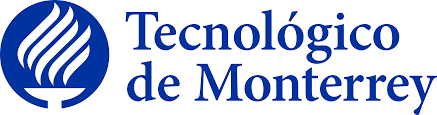

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas



**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

##4.2

Los ejercicios que deben agregarse a este proyecto seran las siguientes:

- Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

- Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

- Investigar una aplicación de opening y closing e implementalo en Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
%matplotlib inline

In [3]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

Las transformaciones morfológicas son algunas operaciones simples basadas en la forma de la imagen, que normalmente se aplican a imágenes binarias. Necesita dos entradas, una es nuestra imagen original, la segunda se llama elemento estructurante o núcleo (kernel) que decide la naturaleza de la operación.

## **Introducción**

La morfología matemática es un amplio conjunto de operaciones de procesamiento de imágenes que procesan imágenes en función de las formas. Los filtros morfológicos (MF) se componen de dos operadores básicos: dilatación y erosión, inspirado en la dilatación y erosión geométricas naturales. Los MF modifican localmente características geométricas de la señal/imagen utilizando una sonda que se asemeja a un segmento de un función/imagen que se llama elemento estructurante. Estos filtros aplican un elemento estructurante a una imagen de entrada, creando una imagen de salida del mismo tamaño. En una operación morfológica, el valor de cada píxel de la imagen de salida se basa en una comparación del píxel correspondiente de la imagen de entrada con sus vecinos.

Esta herramienta se utiliza para extraer componentes de imágenes que son útiles para la representación y descripción de la forma deu una región. Otras aplicaciones de la morfología son el engrosamiento, adelgazamiento, filtrado, esqueletización, relleno de agujeros, etc.

## 1. Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

>Ecuación:

A⊝B={ Z|(B ̂_z )∈A}

Los filtro mofológicos, muchas veces asumen que se trabaja con una imagen binaria donde 0 es el fondo negro y 1 es la imagen en blanco. En la erosión, el elemento estructurante viaja a través de la imagen. Donde el patrón de la imagen y todo el patrón del elemento de estructura coinciden exactamente, el píxel en el punto inicial del elemento de estructura en la imagen cambia a 1. De lo contrario cambia a 0. En otras palabras, el valor del pixel de salida de la operacion es el mínimo valor de todos los pixeles vecinos. En caso de ser una imagen binaria, un pixel se vuelve 0 si alugno de los pixeles vecinos tiene 0 como valor. 

En este sentido las carácteristicas de la erósion son:

1. La erosión elimina píxeles en los límites del objeto. En otras palabras, reduce los objetos de primer plano.
2. Agrandar agujeros en primer plano.
3. Al igual que en los Núcleos de Procesamiento de Imágenes, a mayor tamaño del Elemento de Estructura, aumenta el efecto de la Erosión.
4. Un elemento de estructura diferente da diferentes salidas en la misma imagen de entrada.

Similar a la convolución 2D, en el proceso de erosionado un kernel se desliza a través de la imagen. Un píxel de la imagen original (1 ó 0) sólo se considerará 1 si todos los píxeles que caen detro de la ventana del kernel son 1, de lo contrario se erosiona (se hace a cero). Por tanto, todos los píxeles cerca de los bordes de los objetos en la imagen serán descartados dependiendo del tamaño del kernel. Como consecuencia, el grosor o el tamaño de los objetos en primer plano disminuye o, en otras palabras, la región blanca disminuye en la imagen. Este procedimiento es útil para eliminar pequeños ruidos blancos, separar dos objetos conectados, etc.

La erosión resulta especialmente útil para afinar el contorno de objetos en una fotografía digital, particularmente en el caso de imágenes médicas o de escritura a mano (OCR), donde lo que más nos interesa es el perímetro de las figuras o caracteres.

Orginal 



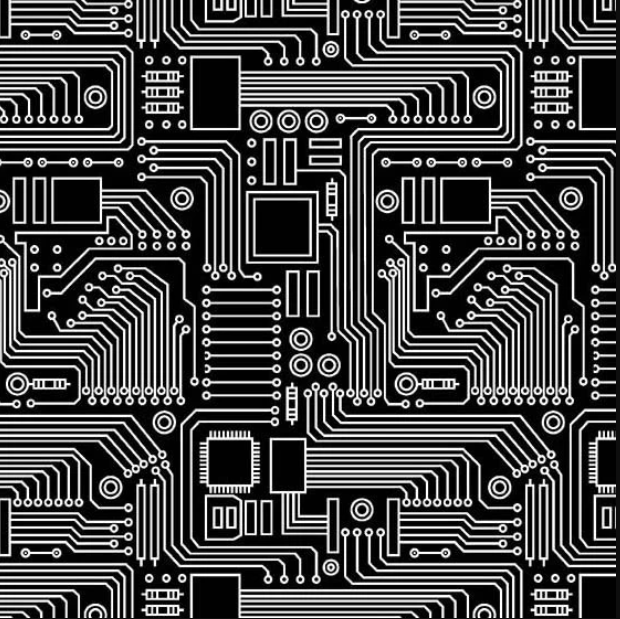

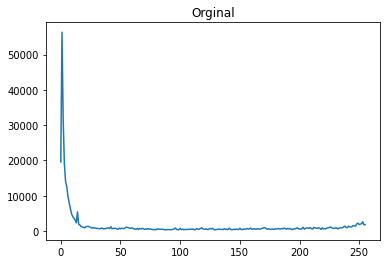

Erosionada 



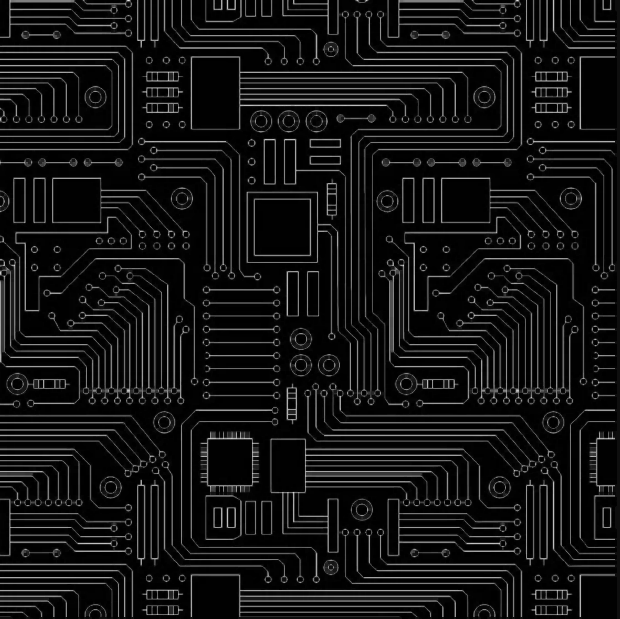

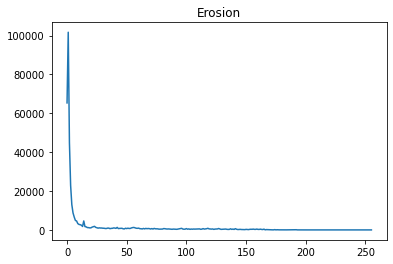

In [5]:
urlErosion = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/Circuito erosion.png"
img_Erosion = cv.imread(urlErosion,cv.IMREAD_GRAYSCALE) 
# img_Erosion = cv.resize(img_Erosion, (200,200))

kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img_Erosion,kernel,iterations = 1)

print("Orginal \n")
cv2_imshow(img_Erosion)
gethistogram(img_Erosion,"Orginal")


print("Erosionada \n")
cv2_imshow(erosion)
gethistogram(erosion,"Erosion")


>Aplicación

Las huellas dactilares siempre se han empleado como pruebas de
delincuencia desde el siglo XIX; esto demuestra ser uno de las más
herramientas importantes empleadas en la ciencia forense. En los casos en que el
no se puede determinar a los delincuentes o cuando no hubo testigos
encontrados, se busca obtener huellas dactilares latentes de la escena del crimen. Estás no son más que impresiones que quedan en la superficie y causadas por la crestas en la piel. Desafortunadamente, la mayoría de los casos están degradadas o incompletas. En este caso, los operadores morfologicos pueden ser utilizados para mejorar la calidad de las huellas. 

A continuacion se muestra un caso donde se utiliza la erosión para la reducción de ruido en la muestra biométrica.

Orginal 



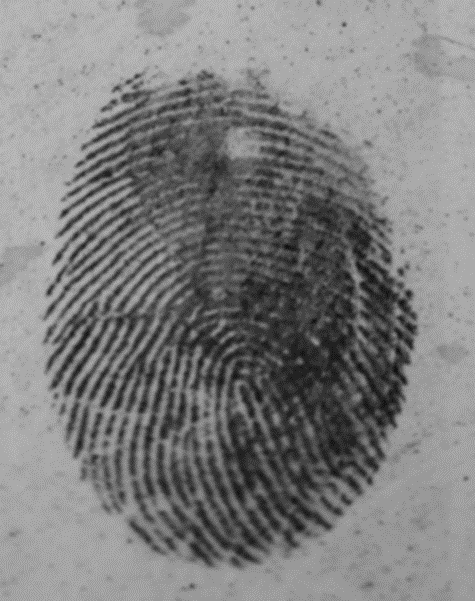

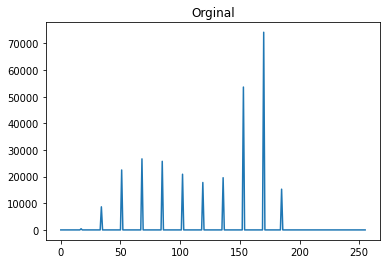

Threshold 



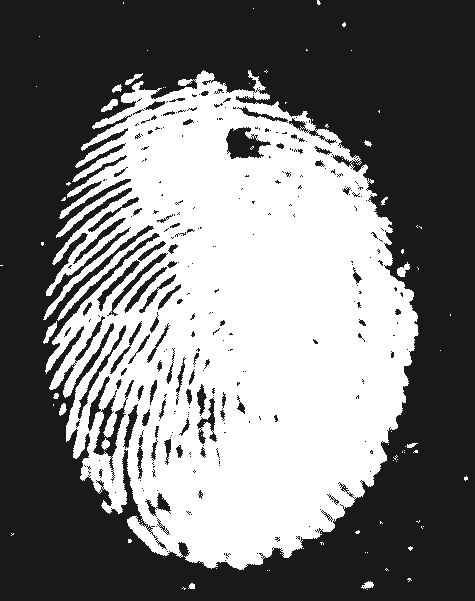

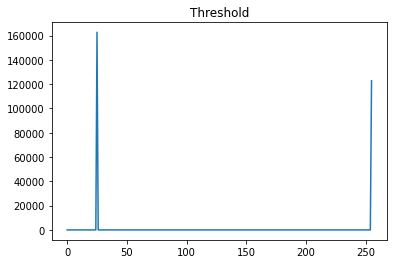

Erosionada 



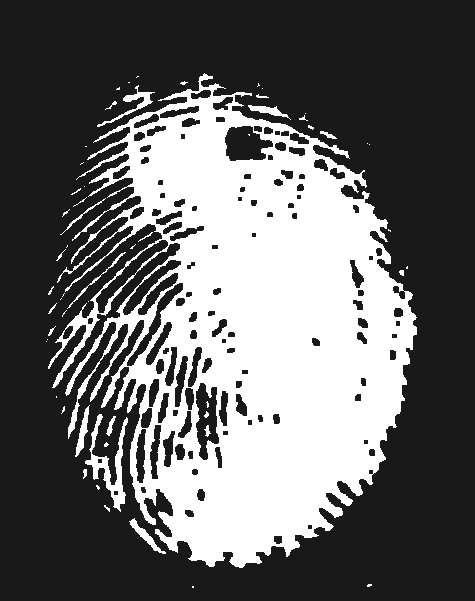

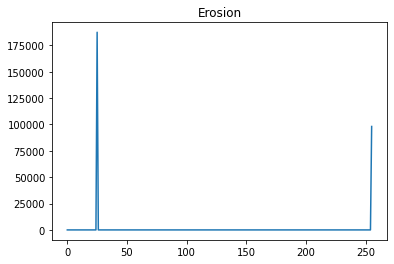

In [9]:
urlErosion = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/Huella.png"
img_Erosion = cv.imread(urlErosion,cv.IMREAD_GRAYSCALE) 
# img_Erosion = cv.resize(img_Erosion, (200,200))

ret, th = cv.threshold(img_Erosion, 130, 230, cv.THRESH_BINARY)
th2 = abs(255-th)

kernel = np.ones((4,4),np.uint8)
erosion = cv.erode(th2,kernel,iterations = 1)

print("Orginal \n")
cv2_imshow(img_Erosion)
gethistogram(img_Erosion,"Orginal")


print("Threshold \n")
cv2_imshow(th2)
gethistogram(th2,"Threshold")

print("Erosionada \n")
cv2_imshow(erosion)
gethistogram(erosion,"Erosion")

Como se puede ver en la imagen erosionada, el ruido de la tinta fue practicamente removido en su totalidad. Es claro que otras tácnicas de análisis de imagen tienen que ser aplicadas adiconalmente para completar la huella.

##2. Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

>Ecuación

A⊕B={ Z|[(B ̂_z )∩A]∈A}

Por el contrario, en la dilatación, el elemento estructurante viaja a través de la imagen. En este caso no es necesario que el patrón sea todo exactamente igual, donde el patrón de imagen y el patrón del elemento de estructura tienen al menos 1 píxel coincidente, el valor del píxel de salida se vuelve 1. De no coincidir en lo absoluto, el pixel de salida se convierte en 0. En otras palabras, el valor del píxel de salida es el valor máximo de todos los píxeles vecinos. En una imagen binaria, un píxel se establece en 1 si alguno de los píxeles vecinos tiene el valor 1.

En este sentido las carácteristicas de la dilatación son:

1. La dilatación agrega píxeles en los límites del objeto.
2. Rellene los agujeros en el primer plano y amplíe los objetos en primer plano.
3. Similarmente a la Erosión, un elemento estructurante más grande da un efecto de dilatación mayor y el resultado depende del elemento estructurante.

El proceso de dilatación es justo lo opuesto a la erosión. Aquí, un elemento de píxel es ‘1’ si al menos un píxel de la imagen de los que caen dentro de la ventana del kernel es ‘1’. Por lo tanto, la dilatación aumenta el tamaño de los objetos de primer plano, es decir, la región blanca. Normalmente, en casos como la eliminación del ruido, la erosión es seguida de dilatación. La razón para esto es que aunque la erosión elimina los ruidos blancos también encoge los objetos. Por tanto, para recuperar el tamaño inicial, este se dilata. La transformación de dilatación también es útil para unir partes rotas de un objeto.

Dilatar una imagen consiste en “estirar”, de alguna forma, los objetos representados en ella. ¿Cómo? Imagina que tenemos una lupa, la cual vamos desplazando alrededor de la superficie de la imagen. Cada vez que nos enfocamos en un punto, este se expande, permitiéndonos detallarlo mejor. Ahora, imagina que ésta lupa tiene un resultado permanente. Es decir, una vez que hacemos “zoom” sobre un área, esta permanece estirada. 

Orginal 



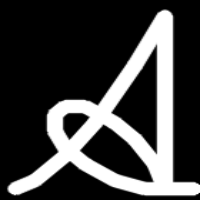

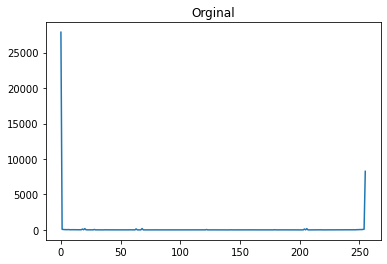

Dilatada 



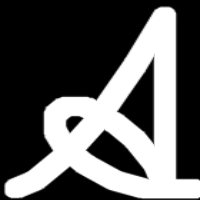

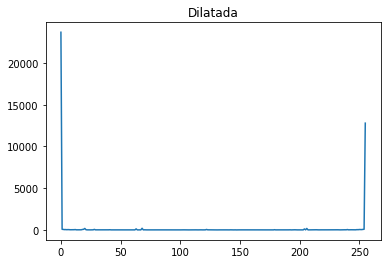

In [10]:
urlDilatacion = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/A.png"
img_Dilatacion = cv.imread(urlDilatacion,cv.IMREAD_GRAYSCALE) 
img_Dilatacion = cv.resize(img_Dilatacion, (200,200))

kernel = np.ones((7,7),np.uint8)
dilatacion = cv.dilate(img_Dilatacion,kernel,iterations = 1)

print("Orginal \n")
cv2_imshow(img_Dilatacion)
gethistogram(img_Dilatacion,"Orginal")


print("Dilatada \n")
cv2_imshow(dilatacion)
gethistogram(dilatacion,"Dilatada")

>Aplicación

Los bordes en una imagen son la característica más básica y, por ende, son causa de mucha investigación. La detección de bordes es una técnica de bajo nivel que se utiliza para el objetivo de detección de límites de objetos. Esta es una herramienta fundamental en el procesamiento de imágenes, análisis de imágenes, visión artificial y  computacional, particularmente en las áreas de detección y extracción de características. 
Algunos estudios han demostrado que dilatar produce mejores resultados a la hora de obtener los bordes de una imagen, en comparacion con técnicas como la expansión. 

A continacuón se muestra un ejemplo.

In [11]:
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

In [12]:
def sobel(imagen):
  Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
  Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
  sob_x = convolve(imagen, Gx) 
  sob_y = convolve(imagen, Gy) 
  #calculate the gradient magnitude of vectors
  sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
  # mapping values from 0 to 255
  sob_out = (sob_out / np.max(sob_out)) * 255

  return sob_out

Orginal 



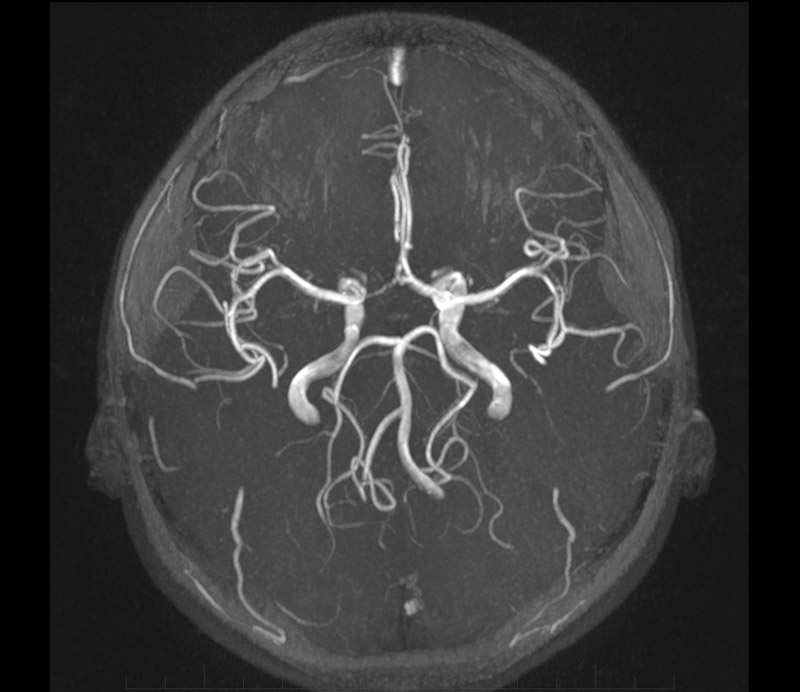

In [13]:
urlDilatacion = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/MRI.png"
img_Dilatacion = cv.imread(urlDilatacion,cv.IMREAD_GRAYSCALE) 

print("Orginal \n")
cv2_imshow(img_Dilatacion)

Sobel Image 



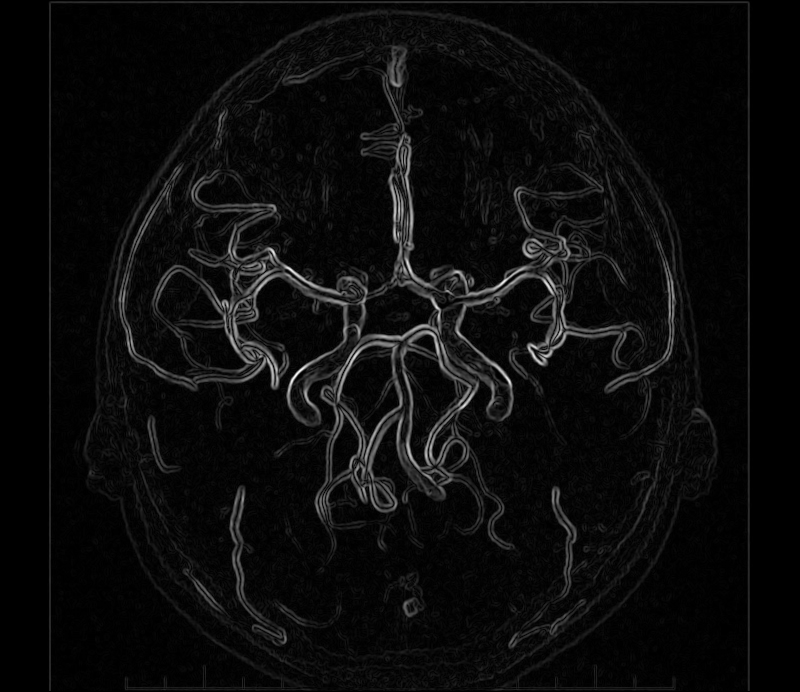

In [14]:
print("Sobel Image \n")
sob_out = sobel(img_Dilatacion) 
cv2_imshow(sob_out)

Dilatada 



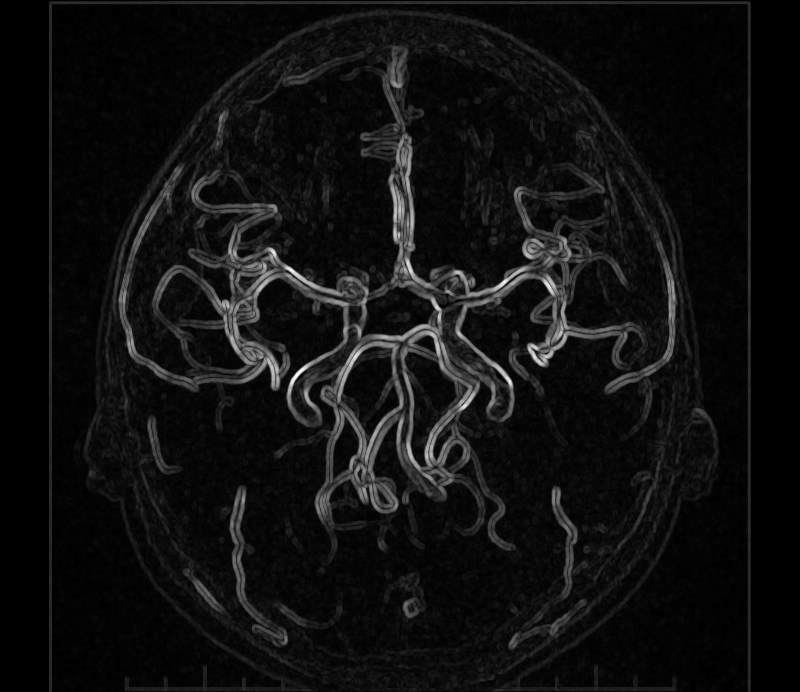

In [15]:
k=2
SE= np.ones((k,k), dtype=np.uint8)

dilated = cv.dilate(sob_out,SE,iterations = 1)

print("Dilatada \n")
cv2_imshow(dilated)

##3. Investigar una aplicación de opening y closing e implementalo en Google Colab

### Opening

La apertura morfológica de una imagen es básicamente erosión seguida de dilatación.

>Ecuación

A∘B=OPEN(A,B)=(A⊝B)⊕B

La apertura es simplemente otro nombre para erosión seguida de dilatación. Como se explicó anteriormente, es útil para eliminar el ruido de "sal".

Orginal 



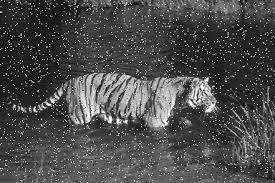

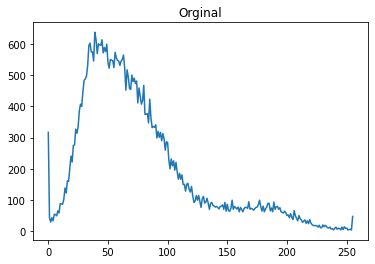

Abierta 



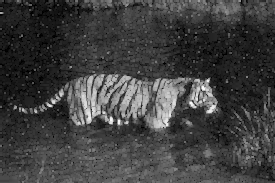

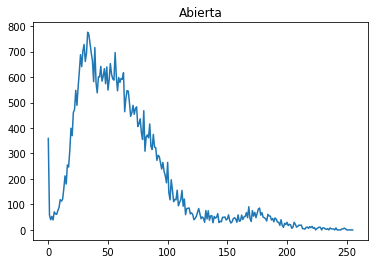

In [19]:
urlOpCLo = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/tigresalt.jpg"
img_OpeClo = cv.imread(urlOpCLo,cv.IMREAD_GRAYSCALE) 
# img_OpeClo = cv.resize(img_OpeClo, (200,200))

kernel = np.ones((2,2),np.uint8)
	
opening = cv.morphologyEx(img_OpeClo, cv.MORPH_OPEN, kernel)

print("Orginal \n")
cv2_imshow(img_OpeClo)
gethistogram(img_OpeClo,"Orginal")

print("Abierta \n")
cv2_imshow(opening)
gethistogram(opening,"Abierta")

### Closing

La apertura morfológica de una imagen es básicamente dilatación seguida de erosión.

>Ecuación

A∙B=CLOSE(A,B)= (A⊕B)⊝



El Cierre es el opuesto de Apertura, es decir, dilatación seguida de erosión. Es útil para cerrar pequeños agujeros dentro de los objetos de primer plano, o pequeños puntos negros en el objeto. Es eficaz para eliminar el ruido de la pimienta.

Orginal 



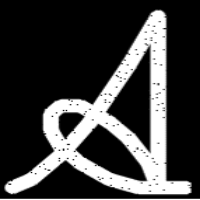

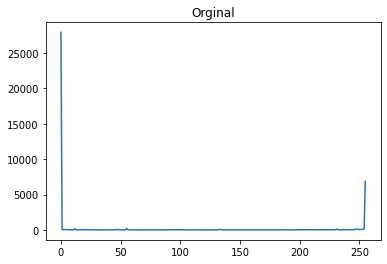

Cerrada 



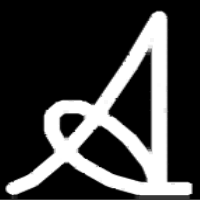

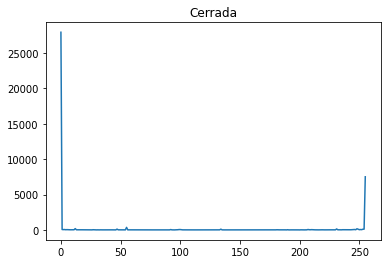

In [25]:
urlOpCLo = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/Closing.png"
img_OpeClo = cv.imread(urlOpCLo,cv.IMREAD_GRAYSCALE) 
img_OpeClo = cv.resize(img_OpeClo, (200,200))

kernel = np.ones((4,4),np.uint8)

closing = cv.morphologyEx(img_OpeClo, cv.MORPH_CLOSE, kernel)

print("Orginal \n")
cv2_imshow(img_OpeClo)
gethistogram(img_OpeClo,"Orginal")

print("Cerrada \n")
cv2_imshow(closing)
gethistogram(closing,"Cerrada")

>Aplicación

La detección de bordes de imágenes médicas es un trabajo importante para el reconocimiento de objetos de los órganos humanos y es un paso importante de preprocesamiento en la segmentación de imágenes médicas y la reconstrucción 3D. Convencionalmente, el borde se detecta de acuerdo con algunos de los primeros algoritmos, como el algoritmo basado en gradientes y el algoritmo basado en plantillas, pero no son tan buenos para la detección de bordes de imágenes médicas con ruido. En este artículo, primero se introducen la teoría y las operaciones morfológicas matemáticas básicas, y luego se propone un novedoso algoritmo matemático de detección de bordes morfológicos para detectar el borde de la imagen de TC de los pulmones con ruido de sal y pimienta. Los resultados experimentales muestran que el algoritmo propuesto es más eficiente para la eliminación de ruido y la detección de bordes de imágenes médicas que los algoritmos de detección de bordes basados en plantillas y los algoritmos de detección de bordes morfológicos generales que se utilizan normalmente.

In [28]:
def Laplacian(imagen):
  laplacianX = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

  laplacianY = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
  #normalizing the vectors
  Lap_x = convolve(imagen, laplacianX) / 8.0
  Lap_y = convolve(imagen, laplacianY)  / 8.0
  
  #calculate the gradient magnitude of vectors
  lap_out = np.sqrt(np.power(Lap_x, 2) + np.power(Lap_y, 2))
  # mapping values from 0 to 255
  lap_out = (lap_out / np.max(lap_out)) * 255


  return lap_out

Orginal 



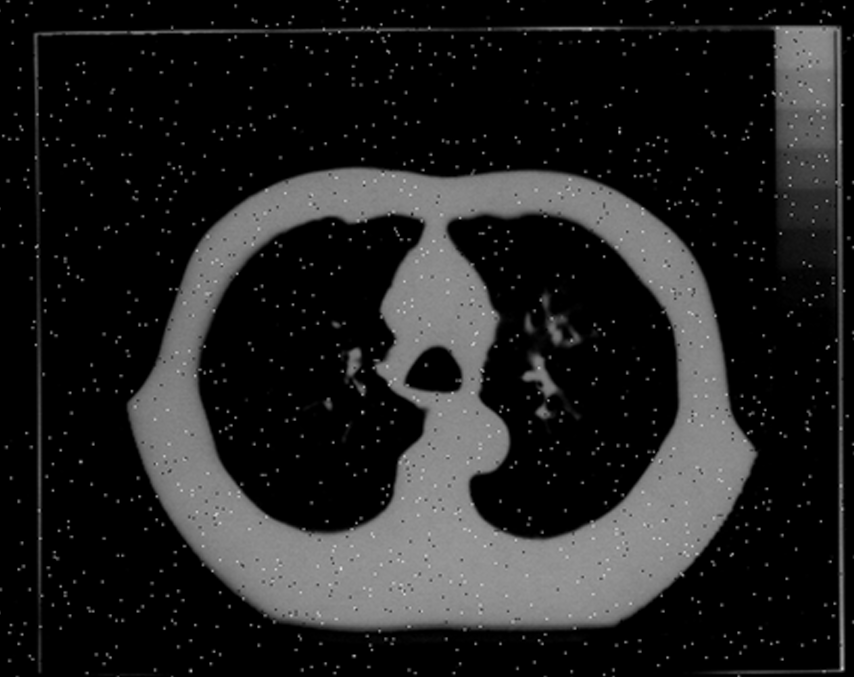

Sobel Image 



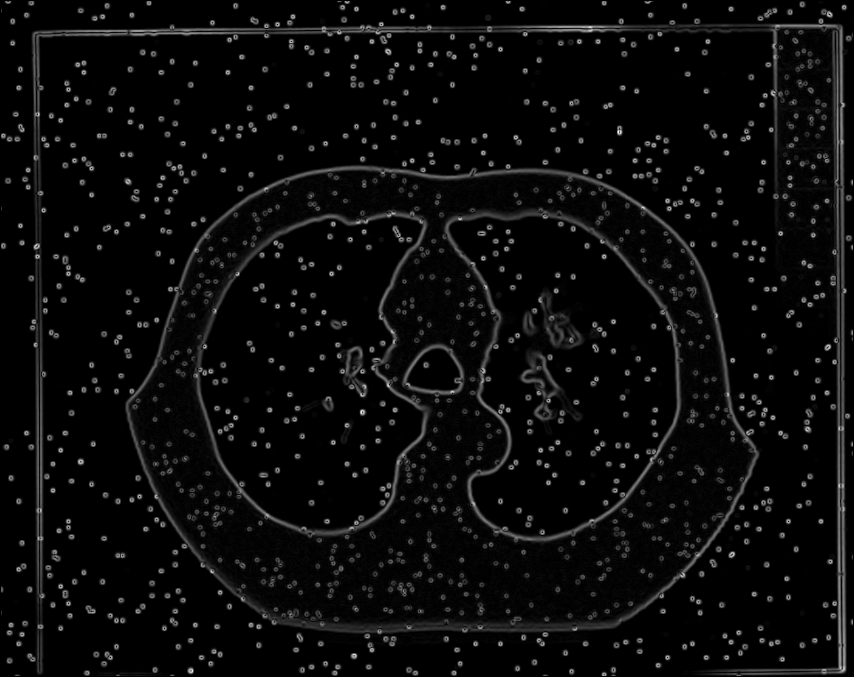

In [34]:
urlOpCLo = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/lungs.PNG"
img_OpeClo = cv.imread(urlOpCLo,cv.IMREAD_GRAYSCALE) 

print("Orginal \n")
cv2_imshow(img_OpeClo)

ret, th = cv.threshold(img_OpeClo, 130, 230, cv.THRESH_BINARY)
th2 = abs(255-th)

print("Sobel Image \n")
sob_out = sobel(img_OpeClo) 
cv2_imshow(sob_out)

Imagen filtrada 



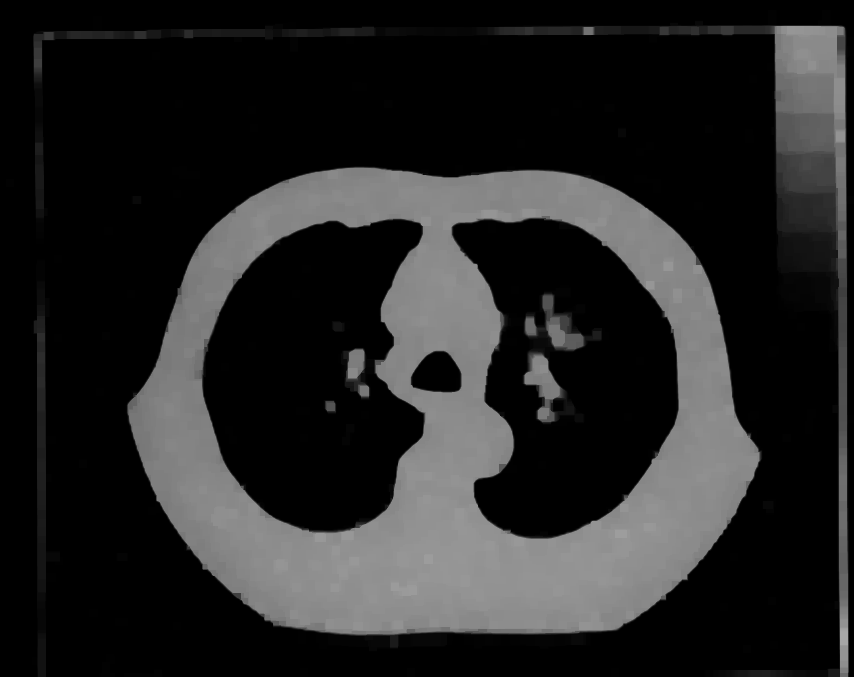

In [86]:
kernel = np.ones((8,8),np.uint8)
opening = cv.morphologyEx(((2*sob_out)+img_OpeClo), cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

print("Imagen filtrada \n")
cv2_imshow(closing)


In [87]:
sobel_image = sobel(closing) 

Final 



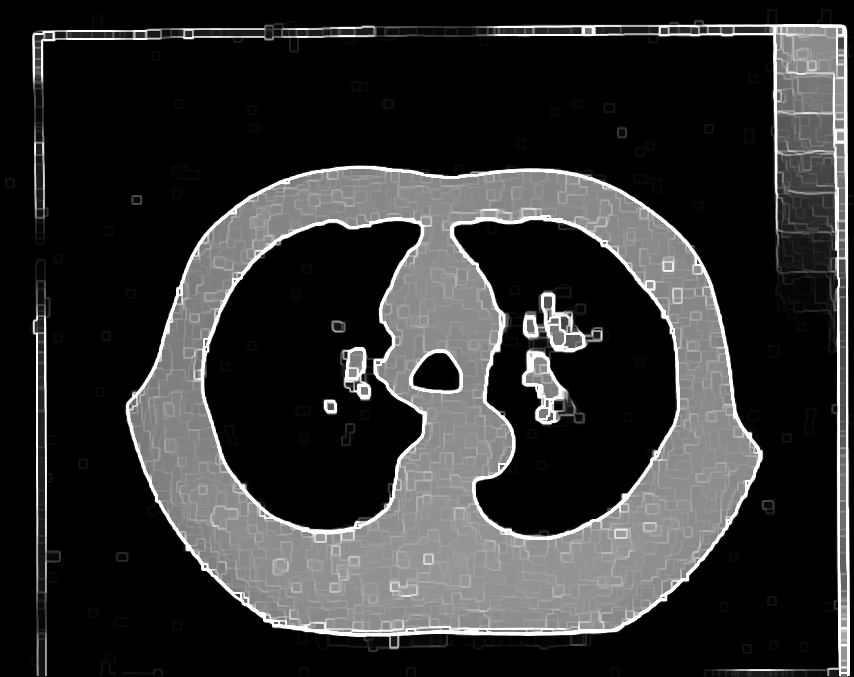

In [88]:
mascara = 5 * sobel_image
final=closing + mascara
kernel = np.ones((8,8),np.uint8)


print("Final \n")
cv2_imshow(final)


#Referencias

- Aktaş, Y. Ç. (18 de 04 de 2021). A Comprehensive Guide to Image Processing: Part 3. Obtenido de https://towardsdatascience.com/image-processing-part-3-dbf103622909 

- DigitalSreeni. (21 de mayo de 2019). 28 - Thresholding and morphological operations using openCV in Python [Archivo de video]. Youtube. https://www.youtube.com/watch?v=WQK_oOWW5Zo

- Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson.

- Mahdi Khosravy, N. G. (09 de 03 de 2017). Morphological Filters: An Inspiration from Natural Geometrical Erosion and Dilation. Obtenido de https://link.springer.com/chapter/10.1007/978-3-319-50920-4_14

- MathWorks. (2022). Types of Morphological Operations. Obtenido de https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html

- Munshi, A. (20 de 10 de 2020). Morphological image processing operations- Dilation, Erosion, Opening and Closing with and without inbuilt CV2 functions. Obtenido de https://medium.com/@ami25480/morphological-image-processing-operations-dilation-erosion-opening-and-closing-with-and-without-c95475468fca

- Nirmal. K, M. G. (02 de 2014). Enhancement of Latent Fingerprints using Morphological Filters . Obtenido de chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ijert.org/research/enhancement-of-latent-fingerprints-using-morphological-filters-IJERTV3IS21351.pdf

- OpenCV. (2022). Morphological Transformations. Obtenido de https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

- Orhei, C. B. (15 de 06 de 2021). DILATED FILTERS FOR EDGE DETECTION ALGORITHMS. Obtenido de chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/2106.07395.pdf

- ProgrammingKnowledge. (8 de mayo de 2019). OpenCV Python Tutorial For Beginners 17 _ Morphological Transformations [Archivo de video]. Youtube. https://www.youtube.com/watch?v=xSzsD4kXhRw

- Ruiz, G. O. (2022). Tema 2.4 Operaciones Basicas. Mexico: ITESM.

- Singh, R. (11 de 08 de 2020). Morphological Transformations of Images using OpenCV | Image Processing Part-2. Obtenido de https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

- Unipython. (2019). TRANSFORMACIONES MORFOLÓGICAS. Obtenido de https://unipython.com/transformaciones-morfologicas/

- Y. Zhang, T. Y. Ji, M. S. Li and Q. H. Wu, "Identification of Power Disturbances Using Generalized Morphological Open-Closing and Close-Opening Undecimated Wavelet," in IEEE Transactions on Industrial Electronics, vol. 63, no. 4, pp. 2330-2339, April 2016, doi: 10.1109/TIE.2015.2499728. chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ttcenter.ir/ArticleFiles/ENARTICLE/3716.pdf 
